In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import os
import time
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
tweepy_api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_handles = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
sentiment_scores = []
tweets = []
                  

In [3]:
for twitter_handle in target_handles:
    counter = 1
    for page in range(5):
        public_tweets = tweepy_api.user_timeline(twitter_handle, page = page+1)
        for tweet in public_tweets:
            TweetsAgo = counter
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            tweets = ("Tweet %s: %s" % (counter, tweet["text"]))
            sentiment_scores.append({
                "News Agency": twitter_handle,
                "Date": tweet["created_at"], 
                "compound": compound, 
                "positive": pos, 
                "negative": neg, 
                "neutral": neu, 
                "Tweets Ago": TweetsAgo, "tweets": tweets})
            
            counter = counter + 1
            

In [4]:
senti_df = pd.DataFrame.from_dict(sentiment_scores)
senti_df.head()

,Date,News Agency,Tweets Ago,compound,negative,neutral,positive,tweets
0,Thu Apr 05 20:02:00 +0000 2018,@BBC,1,-0.6908,0.217,0.783,0.000,"Tweet 1: 'There’s the England before Stephen, ..."
1,Thu Apr 05 18:00:24 +0000 2018,@BBC,2,0.7096,0.000,0.629,0.371,Tweet 2: 🐆 Could building walkways in nature h...
2,Thu Apr 05 17:02:05 +0000 2018,@BBC,3,0.0000,0.000,1.000,0.000,Tweet 3: 😋😋 Pocket-friendly recipes for two.\n...
3,Thu Apr 05 16:00:17 +0000 2018,@BBC,4,-0.7650,0.320,0.680,0.000,"Tweet 4: 👀 From illegal ivory to taxidermy, ta..."
4,Thu Apr 05 15:55:28 +0000 2018,@BBC,5,0.0000,0.000,1.000,0.000,Tweet 5: RT @bbccomedy: Smithy is an irl ray o...


In [11]:
bbc_df = senti_df.loc[senti_df["News Agency"] == '@BBC', :]
cnn_df = senti_df.loc[senti_df["News Agency"] == '@CNN', :]
cbs_df = senti_df.loc[senti_df["News Agency"] == '@CBS', :]
fox_df = senti_df.loc[senti_df["News Agency"] == '@FoxNews', :]
nyt_df = senti_df.loc[senti_df["News Agency"] == '@nytimes', :]
bbc_df.head()

,Date,News Agency,Tweets Ago,compound,negative,neutral,positive,tweets
0,Thu Apr 05 20:02:00 +0000 2018,@BBC,1,-0.6908,0.217,0.783,0.000,"Tweet 1: 'There’s the England before Stephen, ..."
1,Thu Apr 05 18:00:24 +0000 2018,@BBC,2,0.7096,0.000,0.629,0.371,Tweet 2: 🐆 Could building walkways in nature h...
2,Thu Apr 05 17:02:05 +0000 2018,@BBC,3,0.0000,0.000,1.000,0.000,Tweet 3: 😋😋 Pocket-friendly recipes for two.\n...
3,Thu Apr 05 16:00:17 +0000 2018,@BBC,4,-0.7650,0.320,0.680,0.000,"Tweet 4: 👀 From illegal ivory to taxidermy, ta..."
4,Thu Apr 05 15:55:28 +0000 2018,@BBC,5,0.0000,0.000,1.000,0.000,Tweet 5: RT @bbccomedy: Smithy is an irl ray o...


In [12]:
sns.set()

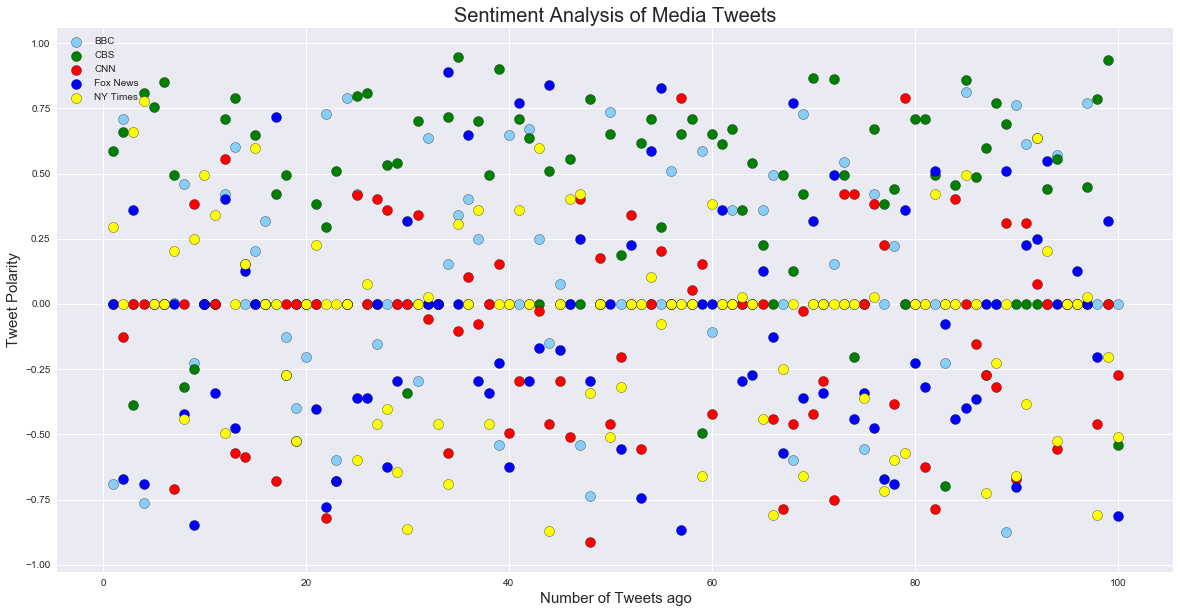

In [18]:
bbc = bbc_df.plot(kind='scatter', x= 'Tweets Ago',y= "compound", color = "lightskyblue",edgecolors="black",
                        grid=True,  figsize=(20,10), legend = True, label = "BBC", s = 100)                                          

cbs_df.plot(kind = 'scatter',x= 'Tweets Ago',y= "compound", color = "green",edgecolors="black",
                        grid=True,  figsize=(20,10),legend = True, label = "CBS", s = 100, ax = bbc )  
                       
cnn_df.plot(kind = 'scatter',x= 'Tweets Ago', y= "compound", color = "red",edgecolors="black",
                        grid=True,  figsize=(20,10), legend = True, label = "CNN", s = 100, ax = bbc )
                       
fox_df.plot(kind = 'scatter',x= 'Tweets Ago',y= "compound", color = "blue",edgecolors="black",
                        grid=True,  figsize=(20,10), legend = True, label = "Fox News", s = 100, ax = bbc )
                       
nyt_df.plot(kind = 'scatter',x= 'Tweets Ago', y= "compound", color = "yellow",edgecolors="black",
                        grid=True,  figsize=(20,10),  legend = True, label = "NY Times", s =100, ax = bbc )
plt.xlabel("Number of Tweets ago", fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)
plt.title("Sentiment Analysis of Media Tweets", fontsize = 20)
plt.savefig("Sentiment_Analysis.png")
plt.show()
               

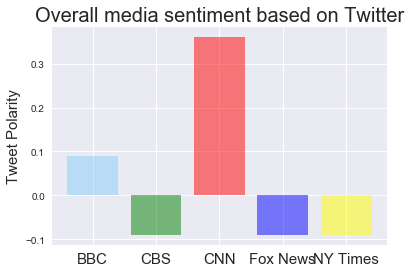

In [17]:
bbc_compound_aggr = round((bbc_df["compound"].mean()),2)
cnn_compound_aggr = round((cnn_df["compound"].mean()),2)
cbs_compound_aggr = round((cbs_df["compound"].mean()),2)
fox_compound_aggr = round((fox_df["compound"].mean()),2)
nyt_compound_aggr = round((nyt_df["compound"].mean()),2)

lineup = [bbc_compound_aggr, cnn_compound_aggr, cbs_compound_aggr, fox_compound_aggr, nyt_compound_aggr]

x_axis = np.arange(len(lineup))
plt.bar(x_axis, lineup, color=['lightskyblue', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY Times"], fontsize = 15)
plt.title("Overall media sentiment based on Twitter", fontsize = 20)
plt.ylabel("Tweet Polarity", fontsize = 15)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Ramz_Media_Sentiment.png")
plt.show()